In [3]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import numpy as np
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------ --------------------- 3.7/7.8 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.8 MB/s eta 0:00:00


In [39]:
class HangulOCRDataset(Dataset):
  def __init__(self, img_dir, labels, transform = None):
    self.img_dir = img_dir
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.labels)
  
  def __getitem__(self, idx):
    # 데이터셋에서 인덱스에 해당하는 이미지와 레이블을 불러옴
    img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
    image = Image.open(img_name)
    label = self.labels.iloc[idx, 1]

    if self.transform:
      image = self.transform(image)
    
    return image, label

In [40]:
def split_dataset(label_file, test_size=0.2, shuffle=True):
    # CSV 파일에서 이미지와 레이블 데이터를 불러옴
    labels = pd.read_csv(label_file)

    # train, test 데이터를 나눔
    train_labels, test_labels = train_test_split(labels, test_size=test_size, shuffle=shuffle)

    return train_labels, test_labels

In [41]:
def display_image_batch(image_batch, rows=4, cols=8):
  fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
  for i, ax in enumerate(axes.flat):
    if i < len(image_batch):
      ax.imshow(np.asarray(image_batch[i].squeeze(0)))
      # ax.set_title(image_labels[i])
      ax.axis("off")
    else:
      ax.axis('off')

  plt.tight_layout()
  plt.show()

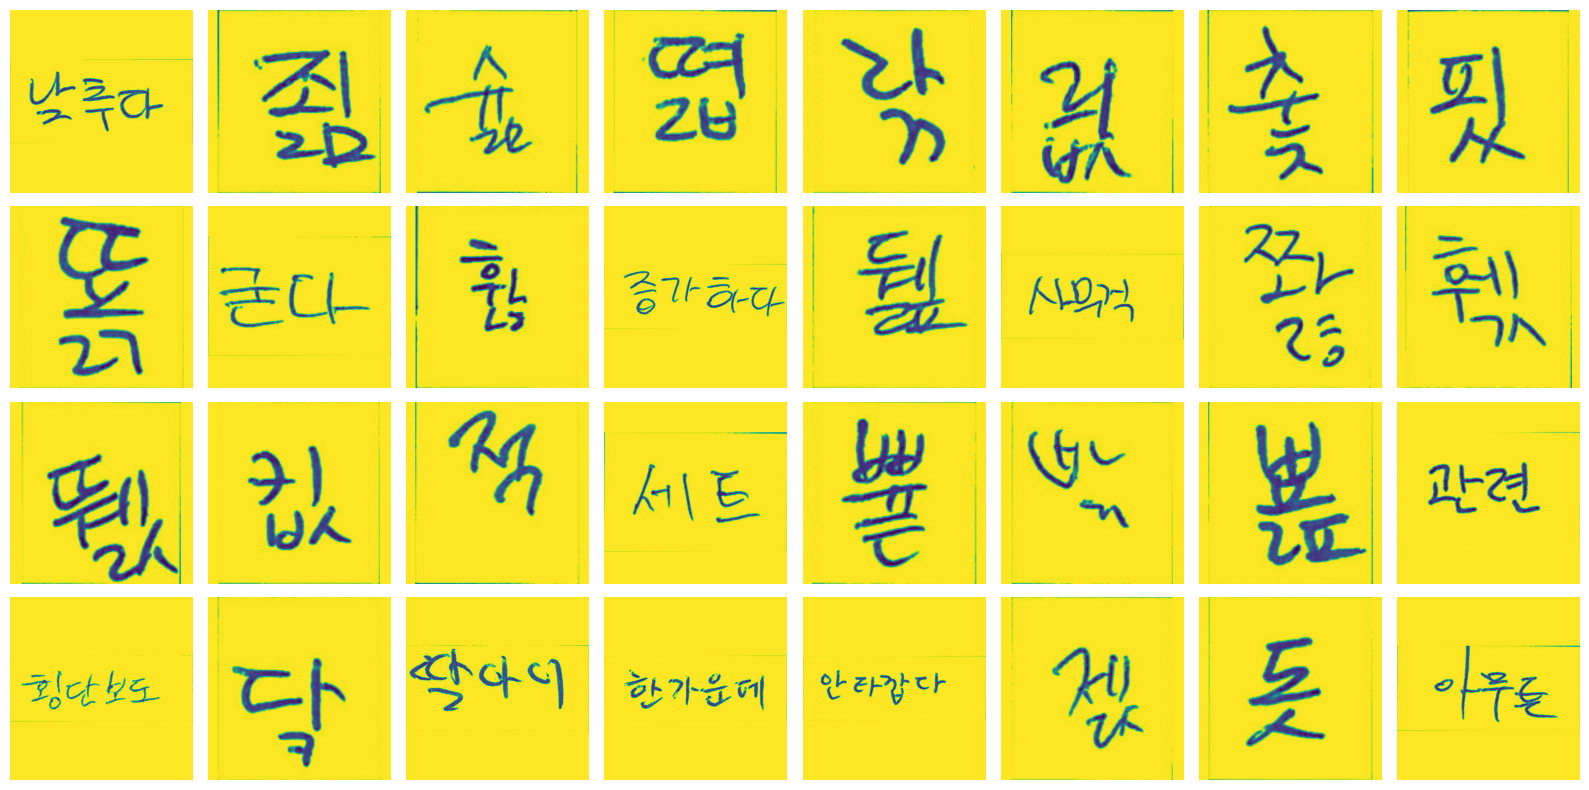

ㄴㅏㅈㅊㅜㄷㅏ


In [48]:
transform = transforms.Compose([
    # transforms.Resize((360, 360)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화
])

# CSV 파일 경로 및 이미지 폴더 설정
img_dir = 'D:/dataset/13.한국어글자체/01.손글씨/image'
label_file = 'D:/dataset/13.한국어글자체/01.손글씨/labels.csv'

# 데이터셋 분할
train_labels, test_labels = split_dataset(label_file, test_size=0.2, shuffle=True)

# train과 test 데이터셋 초기화
train_dataset = HangulOCRDataset(img_dir=img_dir, labels=train_labels, transform=transform)
test_dataset = HangulOCRDataset(img_dir=img_dir, labels=test_labels, transform=transform)

# DataLoader로 셔플 및 배치 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 예시: 첫 번째 배치 확인
images, labels = next(iter(train_loader))
display_image_batch(images)

# images, _ = next(iter(test_loader))
# display_image_batch(images)


print(labels[0]) # label은 string 타입


In [ ]:
#from chatgpt
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

class HangeulOCRDataset(Dataset):
    def __init__(self, img_dir, labels, transform=None):
        # img_dir: 이미지 경로
        # labels: 이미지 파일명과 레이블이 담긴 pandas DataFrame
        self.img_dir = img_dir
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # 데이터셋에서 인덱스에 해당하는 이미지와 레이블을 불러옴
        img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])  # 이미지 파일명
        image = Image.open(img_name).convert("L")  # 그레이스케일 이미지로 변환
        label = self.labels.iloc[idx, 1:].values  # 레이블 (초성, 중성, 종성 또는 자모 시퀀스)

        if self.transform:
            image = self.transform(image)

        return image, label  # 이미지와 레이블 반환

# 데이터셋 분할 함수
def split_dataset(label_file, test_size=0.2, shuffle=True):
    # CSV 파일에서 이미지와 레이블 데이터를 불러옴
    labels = pd.read_csv(label_file)

    # train, test 데이터를 나눔
    train_labels, test_labels = train_test_split(labels, test_size=test_size, shuffle=shuffle)

    return train_labels, test_labels

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((360, 360)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화
])

# CSV 파일 경로 및 이미지 폴더 설정
img_dir = 'data/images'
label_file = 'data/labels.csv'

# 데이터셋 분할
train_labels, test_labels = split_dataset(label_file, test_size=0.2, shuffle=True)

# train과 test 데이터셋 초기화
train_dataset = HangeulOCRDataset(img_dir=img_dir, labels=train_labels, transform=transform)
test_dataset = HangeulOCRDataset(img_dir=img_dir, labels=test_labels, transform=transform)

# DataLoader로 셔플 및 배치 설정
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 예시: 첫 번째 배치 확인
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}, Labels batch shape: {labels.shape}")


In [7]:
jamo_set = {
    'ㄱ': 0, 'ㄲ': 1, 'ㄴ': 2, 'ㄷ': 3, 'ㄸ': 4, 'ㄹ': 5, 'ㅁ': 6, 'ㅂ': 7, 'ㅃ': 8, 'ㅅ': 9,
    'ㅆ': 10, 'ㅇ': 11, 'ㅈ': 12, 'ㅉ': 13, 'ㅊ': 14, 'ㅋ': 15, 'ㅌ': 16, 'ㅍ': 17, 'ㅎ': 18,
    'ㅏ': 19, 'ㅐ': 20, 'ㅑ': 21, 'ㅒ': 22, 'ㅓ': 23, 'ㅔ': 24, 'ㅕ': 25, 'ㅖ': 26, 'ㅗ': 27,
    'ㅘ': 28, 'ㅙ': 29, 'ㅚ': 30, 'ㅛ': 31, 'ㅜ': 32, 'ㅝ': 33, 'ㅞ': 34, 'ㅟ': 35, 'ㅠ': 36,
    'ㅡ': 37, 'ㅢ': 38, 'ㅣ': 39, 
}

num_jamos = len(jamo_set)

embedding_dim = 512

embedding = nn.Embedding(num_embeddings = num_jamos, embedding_dim = embedding_dim)


def jamo_to_indices(target): # 자/모음을 인덱스로 변환
    return torch.tensor([jamo_set[jamo] for jamo in target])

input_jamos = "ㅇㅏㄴㄴㅕㅇ"
print(jamo_to_indices(input_jamos))
print(embedding(jamo_to_indices(input_jamos)))


def example_jamo_embedding(batch_size, seq_len, hidden_dim):
    # 임베딩 레이어 정의
    
    embedding = nn.Embedding(num_embeddings=num_jamos, embedding_dim=hidden_dim)

    # 임의의 자모 시퀀스 생성
    jamo_sequence = torch.randint(0, num_jamos, (batch_size, seq_len))

    # 임베딩 레이어를 통과한 결과
    embedded_sequence = embedding(jamo_sequence)

    return embedded_sequence

print(example_jamo_embedding(2, 5, 512))

tensor([11, 19,  2,  2, 25, 11])
tensor([[ 0.1513, -0.4448, -0.6524,  ...,  0.3941, -0.6654, -0.3646],
        [-0.1975,  0.5880, -1.4223,  ..., -0.1179,  0.3983,  0.6966],
        [ 0.1457, -0.3821, -0.3175,  ...,  0.6974, -0.0956,  1.4306],
        [ 0.1457, -0.3821, -0.3175,  ...,  0.6974, -0.0956,  1.4306],
        [ 0.6426, -0.2686, -1.8851,  ..., -0.9341, -1.9906,  1.0427],
        [ 0.1513, -0.4448, -0.6524,  ...,  0.3941, -0.6654, -0.3646]],
       grad_fn=<EmbeddingBackward0>)
tensor([[[-4.5883e-01, -1.5667e-01,  1.0916e+00,  ...,  3.6714e-01,
           5.7810e-02,  1.4312e+00],
         [-1.9264e+00, -5.8720e-01,  9.9002e-01,  ..., -1.3918e-01,
          -4.5799e-01,  9.6623e-01],
         [-5.6502e-01, -1.4648e-01, -9.4182e-01,  ...,  5.1482e-01,
          -2.0243e-01,  1.1090e-02],
         [-1.9264e+00, -5.8720e-01,  9.9002e-01,  ..., -1.3918e-01,
          -4.5799e-01,  9.6623e-01],
         [-3.3978e-01,  1.7122e+00,  2.8732e-01,  ..., -3.1081e-01,
          -7.1148e-01

In [2]:
chosung_list = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
jungsung_list = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
jongsung_list = ['', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

print(len(chosung_list), len(jungsung_list), len(jongsung_list))

19 21 28


In [ ]:
def train(model, data_loader, optimizer, criterion, epoch, checkpoint_dir):
  model.train()
  epoch_loss = 0

  for idx, (src, tgt) in enumerate(data_loader):
    src = src.to(model.device)
    tgt = tgt.to(model.device)
    tgt_input = list
    tgt_output = tgt